---
jupytext:
  cell_metadata_filter: -all
  formats: md:myst
  text_representation:
    extension: .md
    format_name: myst
    format_version: 0.13
    jupytext_version: 1.11.5
kernelspec:
  display_name: Python 3
  language: python
  name: python3



# Visualizing proportions

In this section, you will use a different nature-focused dataset to visualize proportions, such as how many different types of fungi populate a given dataset about mushrooms. Let's explore these fascinating fungi using a dataset sourced from Audubon listing details about 23 species of gilled mushrooms in the Agaricus and Lepiota families. You will experiment with tasty visualizations such as:

- Pie charts 🥧
- Donut charts 🍩
- Waffle charts 🧇

A very interesting project called [Charticulator](https://charticulator.com) by Microsoft Research offers a free drag and drop interface for data visualizations. In one of their tutorials they also use this mushroom dataset! So you can explore the data and learn the library at the same time: [Charticulator tutorial](https://charticulator.com/tutorials/tutorial4.html).

## Get to know your mushrooms 🍄

Mushrooms are very interesting. Let's import a dataset to study them:

In [1]:
# Install the necessary dependencies

import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython pywaffle

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

mushrooms = pd.read_csv('https://static-1300131294.cos.accelerate.myqcloud.com/data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


Right away, you notice that all the data is textual. You will have to convert this data to be able to use it in a chart. Most of the data, in fact, is represented as an object:

In [3]:
print(mushrooms.select_dtypes(["object"]).columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


Take this data and convert the 'class' column to a category:

In [4]:
cols = mushrooms.select_dtypes(["object"]).columns
mushrooms[cols] = mushrooms[cols].astype('category')

In [5]:

edibleclass=mushrooms.groupby(['class']).count()
edibleclass

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
Edible,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
Poisonous,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


Now, you can see that it has been grouped into categories according to the poisonous/edible class

If you follow the order presented in this table to create your class category labels, you can build a pie chart:

## Pie!

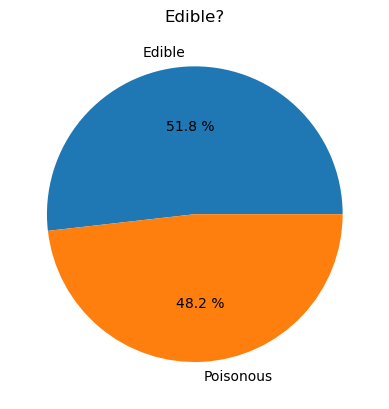

In [6]:
labels=['Edible', 'Poisonous']
plt.pie(edibleclass['population'], labels=labels, autopct='%.1f %%')
plt.title('Edible?')
plt.show()

Voila, a pie chart showing the proportions of this data according to these two classes of mushrooms. It's quite important to get the order of the labels correct, especially here, so be sure to verify the order with which the label array is built!

## Donuts!

A somewhat more visually interesting pie chart is a donut chart, which is a pie chart with a hole in the middle. Let's look at our data using this method.

Take a look at the various habitats where mushrooms grow:

In [7]:

habitat = mushrooms.groupby(['habitat']).count()
habitat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
habitat,,,,,,,,,,,,,,,,,,,,,
Grasses,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Leaves,832,832,832,832,832,832,832,832,832,832,...,832,832,832,832,832,832,832,832,832,832
Meadows,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Paths,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
Urban,368,368,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
Waste,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
Wood,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,...,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148


Here, you are grouping your data by habitat. There are 7 listed, so use those as labels for your donut chart:

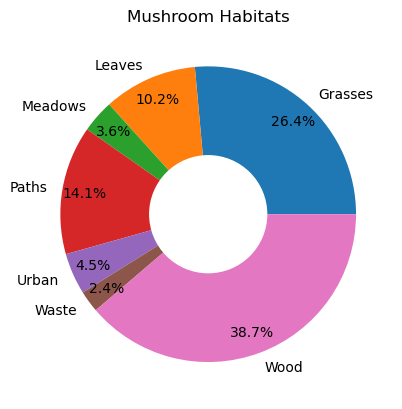

In [8]:
labels = ['Grasses', 'Leaves', 'Meadows', 'Paths', 'Urban', 'Waste', 'Wood']

plt.pie(habitat['class'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Mushroom Habitats')
  
plt.show()

This code draws a chart and a center circle, then adds that center circle in the chart. Edit the width of the center circle by changing `0.40` to another value.

Donut charts can be tweaked in several ways to change the labels. The labels in particular can be highlighted for readability. Learn more in the [docs](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html?highlight=donut).

Now that you know how to group your data and then display it as a pie or donut, you can explore other types of charts. Try a waffle chart, which is just a different way of exploring quantity.

## Waffles!

A 'waffle' type chart is a different way to visualize quantities as a 2D array of squares. Try visualizing the different quantities of mushroom cap colors in this dataset. To do this, you need to install a helper library called [PyWaffle](https://pypi.org/project/pywaffle/) and use Matplotlib.

Select a segment of your data to group together:

In [9]:

capcolor = mushrooms.groupby(['cap-color']).count()
capcolor

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-color,,,,,,,,,,,,,,,,,,,,,
Brown,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284
Buff,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
Cinnamon,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
Green,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856,...,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856
Pink,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Purple,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Red,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
White,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
Yellow,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072


Create a waffle chart by creating labels and then grouping your data:

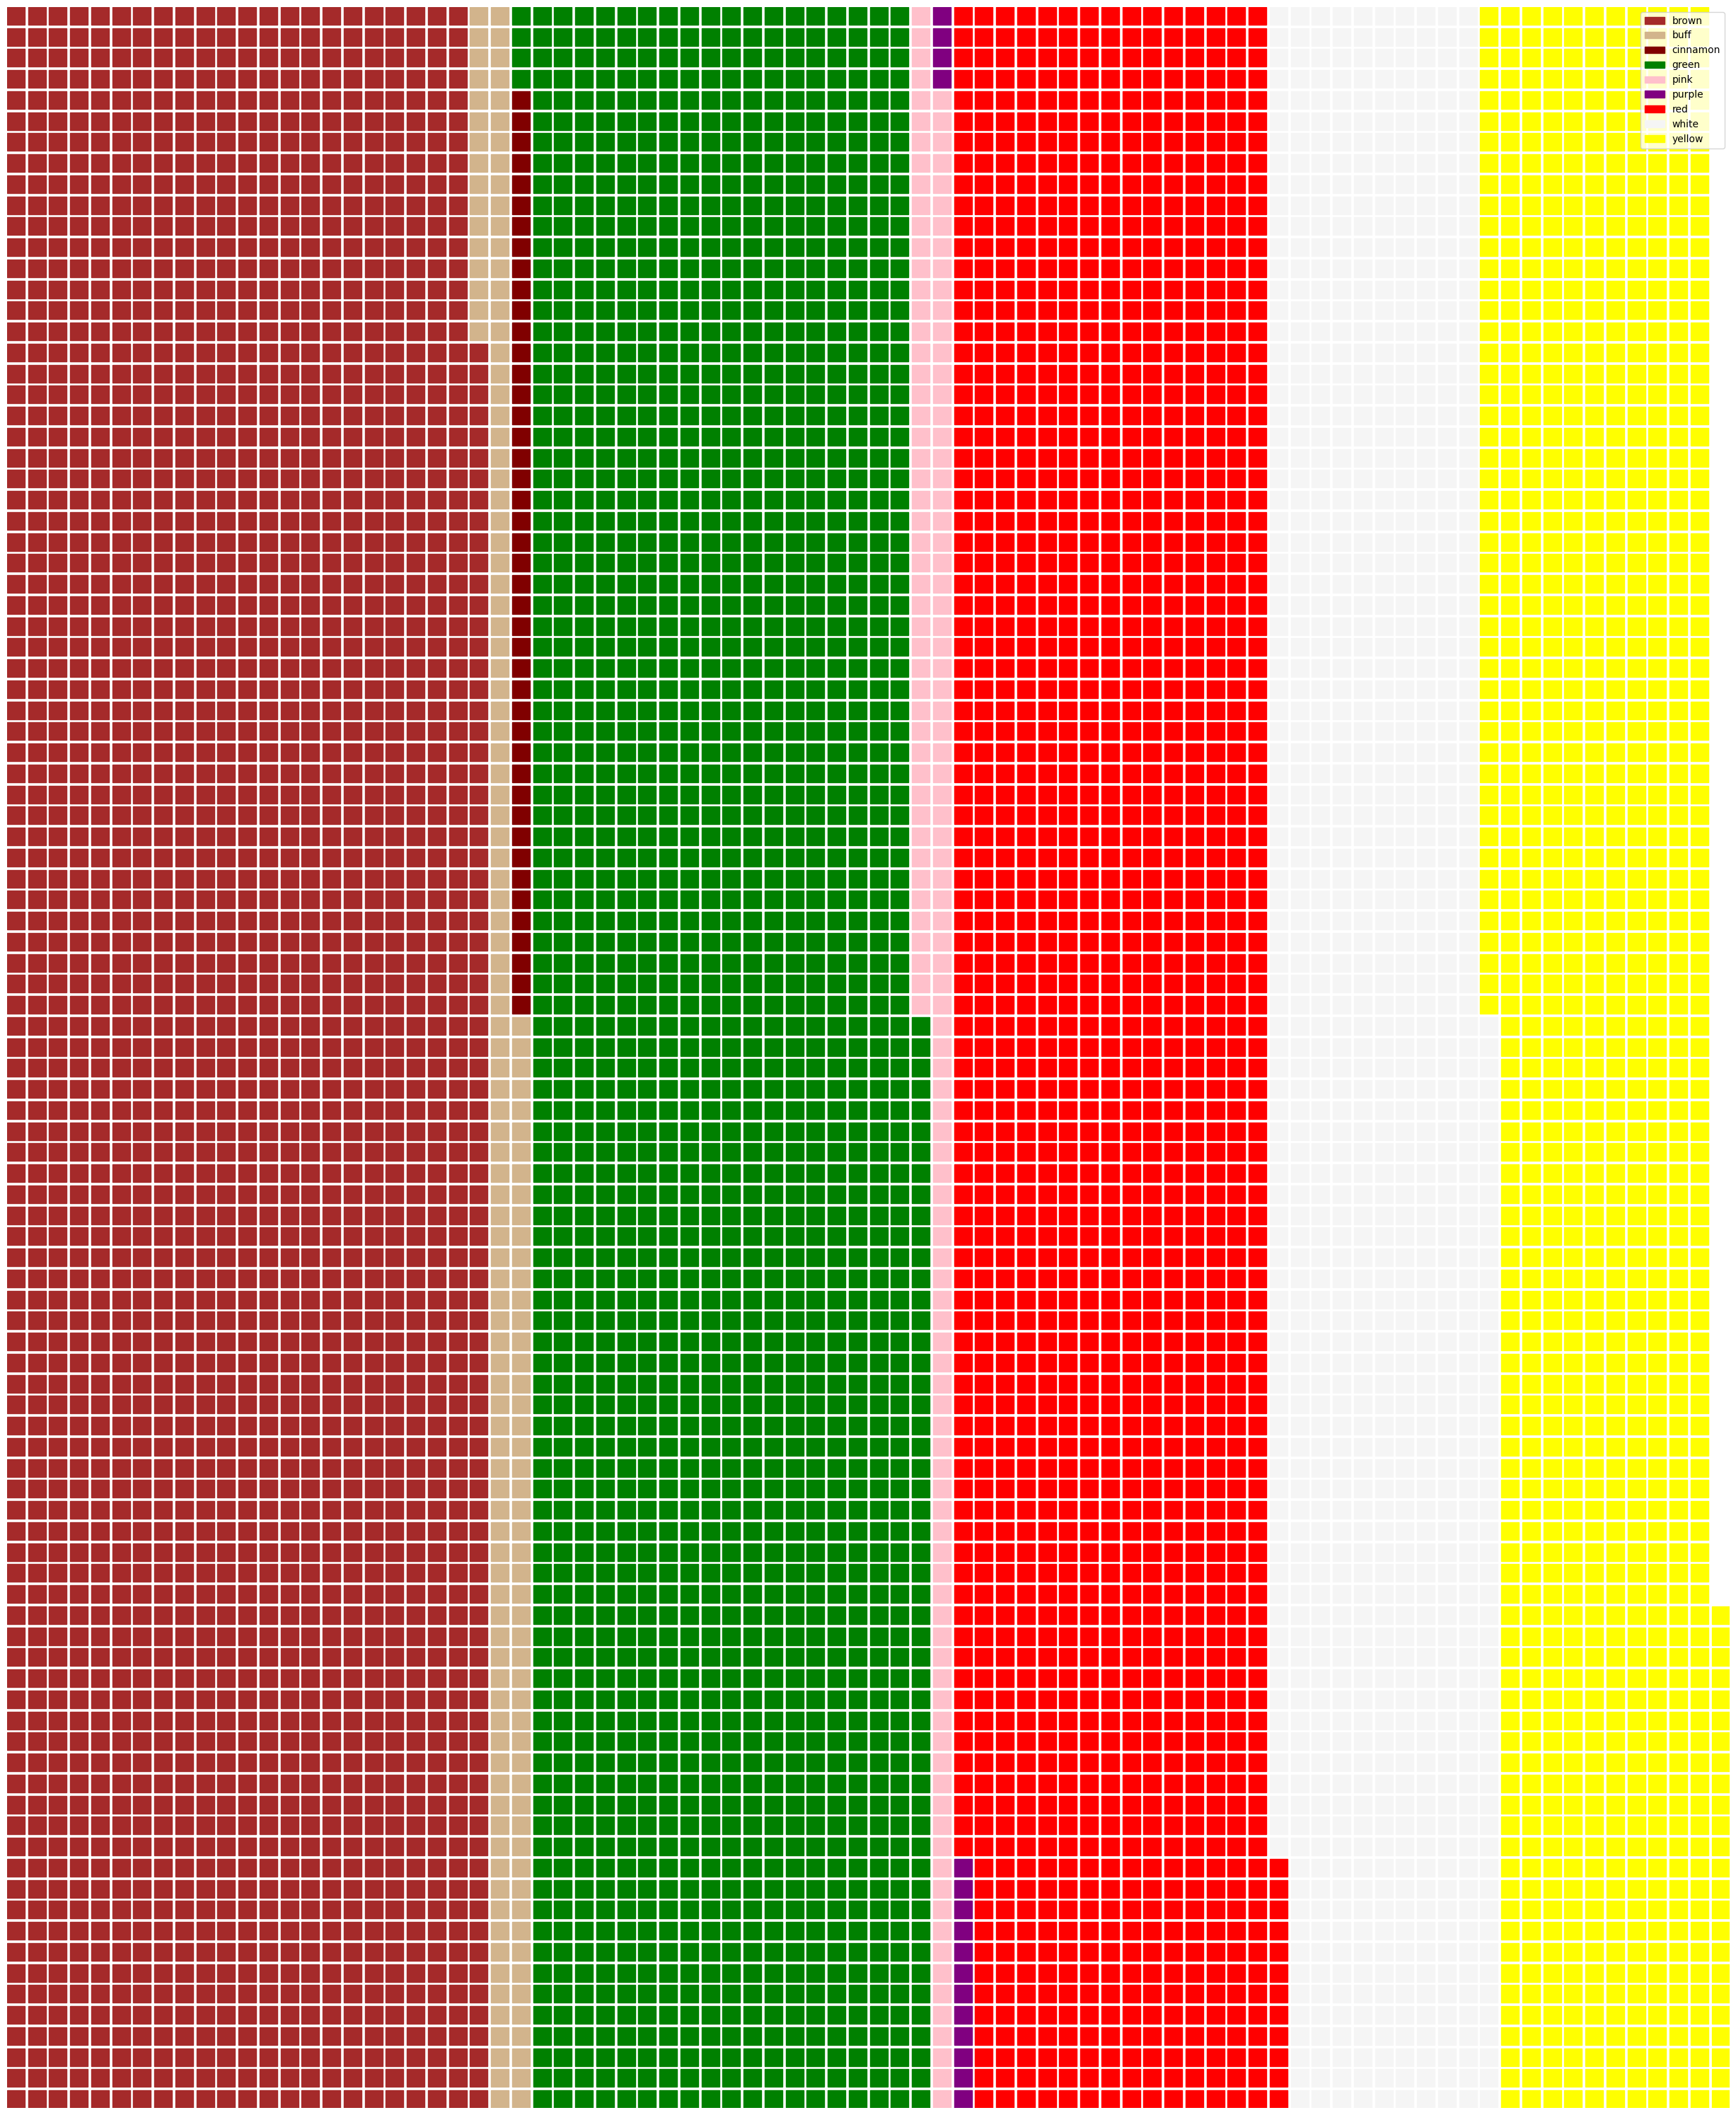

In [10]:
from pywaffle import Waffle
  
data = {
    'color': ['brown', 'buff', 'cinnamon', 'green', 'pink', 'purple', 'red', 'white', 'yellow'],
    'amount': capcolor['class'],
}
  
df = pd.DataFrame(data)
  
fig = plt.figure(
    FigureClass = Waffle,
    rows = 100,
    values = df.amount,
    labels = list(df.color),
    figsize = (30, 30),
    colors=["brown", "tan", "maroon", "green", "pink", "purple", "red", "whitesmoke", "yellow"],
)

Using a waffle chart, you can plainly see the proportions of cap colors of this mushrooms dataset. Interestingly, there are many green-capped mushrooms!

Pywaffle supports icons within the charts that use any icon available in [Font Awesome](https://fontawesome.com/). Do some experiments to create an even more interesting waffle chart using icons instead of squares.

In this section, you learned three ways to visualize proportions. First, you need to group your data into categories and then decide which is the best way to display the data - pie, donut, or waffle. All are delicious and gratify the user with an instant snapshot of a dataset.

## Self study

Sometimes it's not obvious when to use a pie, donut, or waffle chart. Here are some articles to read on this topic:

- [Battle of the Charts: Pie Chart vs. Donut Chart| The Beautiful Blog](https://www.beautiful.ai/blog/battle-of-the-charts-pie-chart-vs-donut-chart)
- [Pie Chart vs. Donut Chart: Showdown in the Ring](https://medium.com/@hypsypops/pie-chart-vs-donut-chart-showdown-in-the-ring-5d24fd86a9ce)
- [About Doughnut Charts](https://www.mit.edu/~mbarker/formula1/f1help/11-ch-c6.htm)
- [Data Visualization Done the Right Way with Tableau- Waffle Chart](https://medium.datadriveninvestor.com/data-visualization-done-the-right-way-with-tableau-waffle-chart-fdf2a19be402)

Do some research to find more information on this sticky decision.

## Your turn! 🚀

Try recreating these tasty charts in [Charticulator](https://charticulator.com).

Assignment - [Try it in Excel](https://static-1300131294.cos.ap-shanghai.myqcloud.com/assignments/data-science/try-it-in-excel.md)

## Acknowledgments

Thanks to Microsoft for creating the open-source course [Data Science for Beginners](https://github.com/microsoft/Data-Science-For-Beginners). It inspires the majority of the content in this chapter.